In [1]:
# best 3 solutions based on EXP1 in turns of f1 weighted is:
# SVM, RoadNet+Segment NO_TOTAL, 0.553202
# RFcls, RoadNet+Segment TOTAL, 0.547742
# GDBcls, RoadNet+Segment TOTAL, 0.542030
# with ~2014, min-max, no feature selection

In [2]:
import pandas as pd
%matplotlib inline

In [8]:
SEEDS = [0, 100, 972, 5258, 7821, 40918, 57852, 168352, 291592, 789729423]


In [10]:
f1_choices = ['test_f1_weighted', 'test_f1_macro', 'test_f1_micro']

In [11]:
def get_paper_table(means, f1_type, key_cols):
    cols_name_convert = {'RoadNet': 'RoadNet', 'RoadNet+Segment_NO_TOTAL_~2014': 'RoadNet+Segment type',
     'RoadNet+Segment_TOTAL_~2014': 'RoadNet+Segment total', 'Segment_NO_TOTAL_~2014': 'Segment type',
     'Segment_TOTAL_~2014': 'Segment total'}
    means_for_pivot = means.reset_index()
    means_for_pivot['key'] = means_for_pivot.apply(lambda x: tuple([x[col] for col in key_cols]), axis=1)
    table = means_for_pivot.reset_index().pivot(index='key', columns='ftr_combo_name', values=f1_type)
    table.index = pd.MultiIndex.from_tuples(table.index, names=key_cols)    
    table.columns.name = f1_type
    table.columns = [cols_name_convert[col] for col in table.columns]
    return table[['RoadNet', 'Segment total', 'Segment type', 'RoadNet+Segment total', 'RoadNet+Segment type']]

# Upsample result

In [15]:
def get_up_result(upsample_type, eval_or_grid):
    res = []

    for smote_kind in ['regular', 'svm']:
        for seed in SEEDS:
            exp_path = 'exp3/seed_%d' % seed
            smote_path = '%s/%s_%s' % (exp_path, upsample_type, smote_kind)
            try:
                df = pd.read_csv('%s/%s_res.csv' % (smote_path, eval_or_grid), index_col=0)
                df['seed'] = seed
                df['smote_kind'] = smote_kind
                res.append(df)
            except FileNotFoundError:
                print('no %s_res in' % eval_or_grid, smote_path)

    res = pd.concat(res, ignore_index=True)
    return res

In [16]:
keys = ['smote_kind', 'model_name', 'feature_selection', 'ftr_combo_name']

In [17]:
up_eval_res = get_up_result('upsample_smote', 'eval')

no eval_res in exp3/seed_972/upsample_smote_regular
no eval_res in exp3/seed_7821/upsample_smote_regular
no eval_res in exp3/seed_972/upsample_smote_svm
no eval_res in exp3/seed_7821/upsample_smote_svm


In [10]:
# up_eval_res[['up_y_dist', 'y_dist']].iloc[::-1]

In [18]:
up_means = up_eval_res.groupby(keys).mean()[f1_choices]
up_stds = up_eval_res.groupby(keys).std()[f1_choices]

f1_type = test_f1_weighted


,,,,test_f1_weighted
smote_kind,model_name,feature_selection,ftr_combo_name,
svm,RFcls,mrmr,RoadNet,0.552031
regular,RFcls,None,RoadNet,0.551058


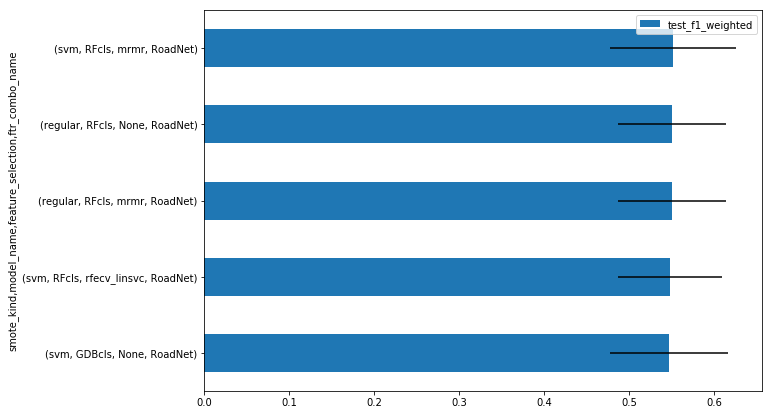

In [19]:
f1_type = f1_choices[0]
print('f1_type =', f1_type)

up_means_to_plot = up_means[[f1_type]].sort_values(f1_type, ascending=True)
up_stds_to_plot = up_stds[[f1_type]]

up_means_to_plot.iloc[-5:].plot(kind='barh', figsize=(10,7), xerr=up_stds_to_plot)
up_means_to_plot.iloc[:-3:-1,:]

In [36]:
f1_type = f1_choices[0]
print('f1_type =', f1_type)

key_cols = ['model_name', 'feature_selection', 'smote_kind']
table = get_paper_table(up_means, f1_type, key_cols)
table.to_csv('deliverables/EXP3 upsampling table %s.csv' % f1_type, encoding='utf8')
table

f1_type = test_f1_weighted


RoadNet  Segment total  \
model_name feature_selection smote_kind                            
GDBcls     None              regular     0.538220       0.416588   
                             svm         0.547187       0.449131   
           mrmr              regular     0.538220       0.397033   
                             svm         0.520802       0.417443   
           rfecv_linsvc      regular     0.540147       0.420008   
                             svm         0.539373       0.438101   
RFcls      None              regular     0.551058       0.410219   
                             svm         0.541390       0.424101   
           mrmr              regular     0.551058       0.412276   
                             svm         0.552031       0.401934   
           rfecv_linsvc      regular     0.543354       0.406523   
                             svm         0.548541       0.426363   
SVM        None              regular     0.494408       0.286852   
                             svm         0.492040       0.379164   
           mrmr              regular     0.494408       0.261276   
                             svm         0.491735       0.347065   
           rfecv_linsvc      regular     0.483561       0.271561   
                             svm         0.505340       0.365997   

                                         Segment type  RoadNet+Segment total  \
model_name feature_selection smote_kind                                        
GDBcls     None              regular         0.487142               0.542810   
                             svm             0.478661               0.517819   
           mrmr              regular         0.471068               0.539811   
                             svm             0.480710               0.520191   
           rfecv_linsvc      regular         0.460936               0.527798   
                             svm             0.462740               0.526951   
RFcls      None              regular         0.468483               0.530588   
                             svm             0.496011               0.515806   
           mrmr              regular         0.485038               0.523707   
                             svm             0.498734               0.541703   
           rfecv_linsvc      regular         0.470551               0.528422   
                             svm             0.481918               0.533841   
SVM        None              regular         0.442940               0.505888   
                             svm             0.445191               0.516485   
           mrmr              regular         0.446433               0.513720   
                             svm             0.444734               0.526295   
           rfecv_linsvc      regular         0.423016               0.471798   
                             svm             0.429072               0.489023   

                                         RoadNet+Segment type  
model_name feature_selection smote_kind                        
GDBcls     None              regular                 0.528099  
                             svm                     0.544495  
           mrmr              regular                 0.525914  
                             svm                     0.541541  
           rfecv_linsvc      regular                 0.524843  
                             svm                     0.515844  
RFcls      None              regular                 0.533790  
                             svm                     0.545825  
           mrmr              regular                 0.534823  
                             svm                     0.513732  
           rfecv_linsvc      regular                 0.518717  
                             svm                     0.510699  
SVM        None              regular                 0.533113  
                             svm                     0.506727  
           mrmr              regular                 0.5

In [ ]:
on_train_grid_res = get_up_result('upsample_smote', 'grid')

In [ ]:
on_train_grid_res[on_train_grid_res['kind']=='cls'].groupby(keys).mean()[['mean_test']]

# downsample result

In [24]:
DOWN_SEEDS = [1749556, 775107, 9410117, 7254933, 9096779, 266976, 3095841,
              4282790, 7964599, 6116962, 2807671, 3038865, 5435116, 7262334,
              3302627, 8296745, 1549265, 3226101, 5886901, 1986252]

In [25]:
def get_down_result(eval_or_grid):
    res = []

    for seed in SEEDS:
        exp_path = 'exp3/seed_%d' % seed
        smote_path = '%s/downsample' % (exp_path)

        try:
            df = pd.read_csv('%s/%s_res.csv' % (smote_path, eval_or_grid), index_col=0)
            df['seed'] = seed
            res.append(df)
        except FileNotFoundError:
            print('no %s_res in' % eval_or_grid, smote_path)

    res = pd.concat(res, ignore_index=True)
    return res

In [26]:
down_res = get_down_result('eval')

In [27]:
down_keys = ['model_name', 'feature_selection', 'ftr_combo_name']

In [28]:
down_means = down_res.groupby(down_keys).mean()[f1_choices]
down_stds = down_res.groupby(down_keys).std()[f1_choices]

In [29]:
# down_res.groupby(down_keys).count()[f1_choices]

f1_type = test_f1_weighted


test_f1_weighted
model_name feature_selection ftr_combo_name                               
GDBcls     None              RoadNet+Segment_TOTAL_~2014          0.356016
           mrmr              RoadNet+Segment_TOTAL_~2014          0.356016

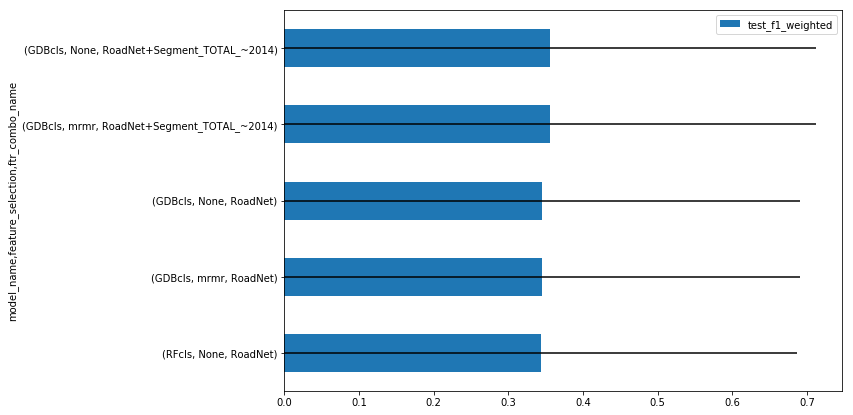

In [31]:
f1_type = f1_choices[0]
print('f1_type =', f1_type)

down_means_to_plot = down_means[[f1_type]].sort_values(f1_type, ascending=True)
down_stds_to_plot = down_stds[[f1_type]]

down_means_to_plot.iloc[-5:].plot(kind='barh', figsize=(10,7), xerr=down_means_to_plot)
down_means_to_plot.iloc[:-3:-1,:]

In [34]:
f1_type = f1_choices[1]
print('f1_type =', f1_type)
key_cols = ['model_name', 'feature_selection']
table = get_paper_table(down_means, f1_type, key_cols)
table.to_csv('deliverables/EXP3 downsampling table %s.csv' % f1_type, encoding='utf8')

f1_type = test_f1_macro
